In [1]:
import torch
import sys
import torch_geometric

In [2]:
print(f"Python Version : {sys.version}")


Python Version : 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]


In [3]:
import sys
import torch
import platform

print("=" * 50)
print("PYTHON ENVIRONMENT")
print("=" * 50)
print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")

print("\n" + "=" * 50)
print("GPU INFORMATION")
print("=" * 50)
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
print(f"GPU device: {torch.cuda.get_device_name(0)}")
print(f"Number of GPUs: {torch.cuda.device_count()}")
print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

print("\n" + "=" * 50)
print("CPU/SYSTEM INFORMATION")
print("=" * 50)
print(f"Platform: {platform.platform()}")
print(f"Processor: {platform.processor()}")
print(f"Architecture: {platform.machine()}")

PYTHON ENVIRONMENT
Python version: 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
Python executable: /usr/local/bin/python

GPU INFORMATION
PyTorch version: 2.8.0+cu128
CUDA available: True
CUDA version: 12.8
GPU device: NVIDIA RTX 2000 Ada Generation
Number of GPUs: 1
GPU memory: 16.8 GB

CPU/SYSTEM INFORMATION
Platform: Linux-6.8.0-51-generic-x86_64-with-glibc2.39
Processor: x86_64
Architecture: x86_64


In [5]:
from torch_geometric.datasets import QM9
import os

# Create data directory
os.makedirs('./data', exist_ok=True)

# Download QM9 dataset
print("Downloading QM9 molecular dataset...")
print("This will take 3-5 minutes (~500MB)")
dataset = QM9(root='./data/QM9')

print(f"\n✅ Dataset downloaded successfully!")
print(f"Total molecules: {len(dataset)}")
print(f"Number of atom features: {dataset.num_features}")

# Get number of targets from first molecule
first_mol = dataset[0]
num_targets = first_mol.y.shape[1] if len(first_mol.y.shape) > 1 else 1
print(f"Number of target properties: {num_targets}")

This will take 3-5 minutes (~500MB)

✅ Dataset downloaded successfully!
Total molecules: 130831
Number of atom features: 11
Number of target properties: 19


In [6]:
# Look at the first molecule
data = dataset[0]

print("=" * 50)
print("FIRST MOLECULE IN DATASET")
print("=" * 50)

print(f"\n📊 Structure:")
print(f"   Number of atoms: {data.x.shape[0]}")
print(f"   Number of bonds (edges): {data.edge_index.shape[1]}")

print(f"\n🔬 Features:")
print(f"   Atom features shape: {data.x.shape}")
print(f"   Edge indices shape: {data.edge_index.shape}")

print(f"\n🎯 Targets:")
print(f"   Target properties shape: {data.y.shape}")
print(f"   (We'll predict these 19 molecular properties)")

print(f"\n📦 Full data object:")
print(data)

FIRST MOLECULE IN DATASET

📊 Structure:
   Number of atoms: 5
   Number of bonds (edges): 8

🔬 Features:
   Atom features shape: torch.Size([5, 11])
   Edge indices shape: torch.Size([2, 8])

🎯 Targets:
   Target properties shape: torch.Size([1, 19])
   (We'll predict these 19 molecular properties)

📦 Full data object:
Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], z=[5], smiles='[H]C([H])([H])[H]', name='gdb_1', idx=[1])


Analyzing dataset statistics (sampling 5000 molecules)...


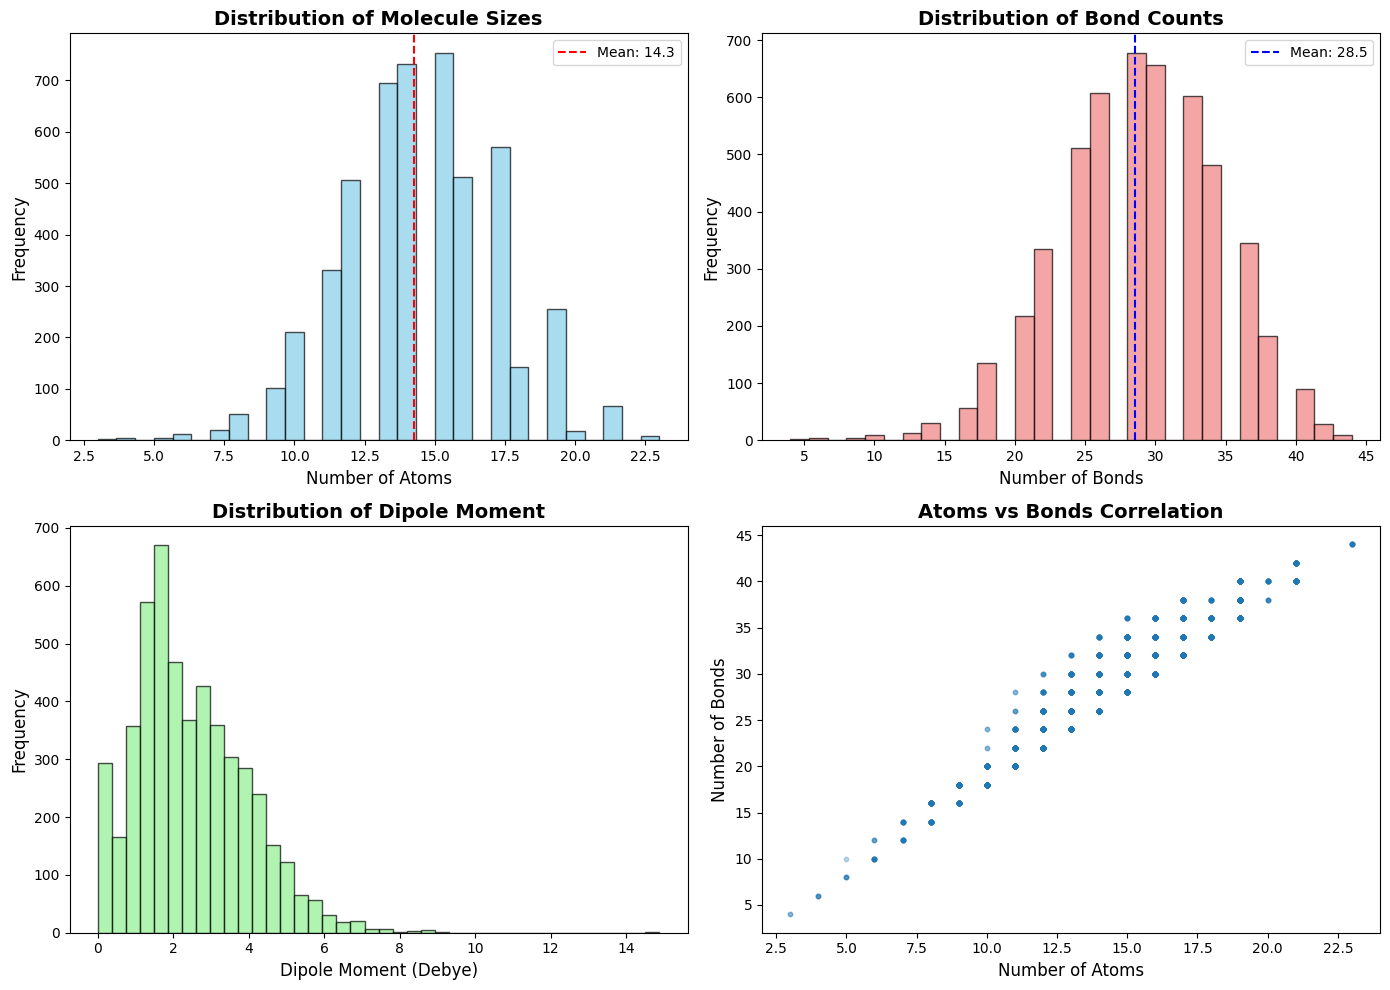


DATASET STATISTICS
Sample size analyzed: 5000 molecules

Molecule sizes:
  Average atoms: 14.3
  Min atoms: 3
  Max atoms: 23

Connectivity:
  Average bonds: 28.5
  Min bonds: 4
  Max bonds: 44

Average bonds per atom: 2.00


In [7]:
import matplotlib.pyplot as plt
import numpy as np

print("Analyzing dataset statistics (sampling 5000 molecules)...")

# Collect statistics from a sample
sample_size = 5000
num_atoms = []
num_bonds = []

for i in range(sample_size):
    data = dataset[i]
    num_atoms.append(data.x.shape[0])
    num_bonds.append(data.edge_index.shape[1])

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Atom count distribution
axes[0, 0].hist(num_atoms, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_xlabel('Number of Atoms', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Molecule Sizes', fontsize=14, fontweight='bold')
axes[0, 0].axvline(np.mean(num_atoms), color='red', linestyle='--', 
                    label=f'Mean: {np.mean(num_atoms):.1f}')
axes[0, 0].legend()

# 2. Bond count distribution
axes[0, 1].hist(num_bonds, bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 1].set_xlabel('Number of Bonds', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Bond Counts', fontsize=14, fontweight='bold')
axes[0, 1].axvline(np.mean(num_bonds), color='blue', linestyle='--', 
                    label=f'Mean: {np.mean(num_bonds):.1f}')
axes[0, 1].legend()

# 3. Target property distribution (first property: dipole moment)
target_values = [dataset[i].y[0, 0].item() for i in range(sample_size)]
axes[1, 0].hist(target_values, bins=40, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Dipole Moment (Debye)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Dipole Moment', fontsize=14, fontweight='bold')

# 4. Correlation between atoms and bonds
axes[1, 1].scatter(num_atoms, num_bonds, alpha=0.3, s=10)
axes[1, 1].set_xlabel('Number of Atoms', fontsize=12)
axes[1, 1].set_ylabel('Number of Bonds', fontsize=12)
axes[1, 1].set_title('Atoms vs Bonds Correlation', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print("\n" + "=" * 50)
print("DATASET STATISTICS")
print("=" * 50)
print(f"Sample size analyzed: {sample_size} molecules")
print(f"\nMolecule sizes:")
print(f"  Average atoms: {np.mean(num_atoms):.1f}")
print(f"  Min atoms: {min(num_atoms)}")
print(f"  Max atoms: {max(num_atoms)}")
print(f"\nConnectivity:")
print(f"  Average bonds: {np.mean(num_bonds):.1f}")
print(f"  Min bonds: {min(num_bonds)}")
print(f"  Max bonds: {max(num_bonds)}")
print(f"\nAverage bonds per atom: {np.mean(num_bonds) / np.mean(num_atoms):.2f}")

In [8]:
# Standard splits for QM9
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

print("=" * 50)
print("DATASET SPLIT FOR TRAINING")
print("=" * 50)
print(f"Total molecules: {len(dataset):,}")
print(f"\nTraining set:   {train_size:,} molecules ({train_size/len(dataset)*100:.1f}%)")
print(f"Validation set: {val_size:,} molecules ({val_size/len(dataset)*100:.1f}%)")
print(f"Test set:       {test_size:,} molecules ({test_size/len(dataset)*100:.1f}%)")

DATASET SPLIT FOR TRAINING
Total molecules: 130,831

Training set:   104,664 molecules (80.0%)
Validation set: 13,083 molecules (10.0%)
Test set:       13,084 molecules (10.0%)

📌 We'll use these splits tomorrow for model training!
